In [53]:
import pandas as pd
import numpy as np

data = pd.read_csv('/home/arnold/TextHeroNew/Feelingz/arnold/data/Emotion_final.csv')
data_2 = pd.read_csv('/home/arnold/TextHeroNew/Feelingz/arnold/data/text_emotion.csv')

In [54]:
#data.head()

In [55]:
#data_2.head()

In [56]:
dfTweet = data_2.drop(['tweet_id','author'],axis = 1)
dfTweet=dfTweet.applymap(str.lower)

In [57]:
#dfTweet.head()

In [58]:
dfJournal=data.applymap(str.lower)

In [59]:
#dfJournal.head()

In [60]:
dfTweet.rename(columns={'sentiment': 'Emotion', 'content': 'Text'}, inplace=True)
dfJournal = dfJournal.append(dfTweet)

In [61]:
#dfJournal.head()

In [62]:
dfJournal.shape

(61459, 2)

In [63]:
dfJournal = dfJournal[:5000]

In [64]:
dfJournal.shape

(5000, 2)

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

II. Cleaning

In [66]:
import texthero as hero

In [67]:
dfJournal['clean_text'] = hero.clean(dfJournal['Text'])

model representation

In [68]:
dfJournal['tfidf_clean_text'] = hero.tfidf(dfJournal['clean_text'])

In [69]:
dfJournal.head()

,Text,Emotion,clean_text,tfidf_clean_text
0,i didnt feel humiliated,sadness,didnt feel humiliated,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,i am feeling grouchy,anger,feeling grouchy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Visualisation

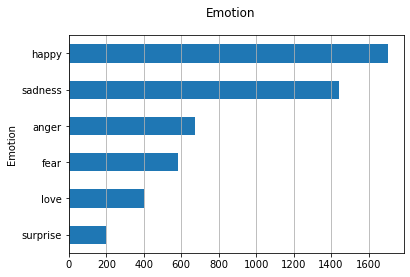

In [70]:
fig, ax = plt.subplots()
fig.suptitle("Emotion", fontsize=12)
dfJournal["Emotion"].reset_index().groupby("Emotion").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [71]:
dfJournal['pca_tfidf_clean_text'] = hero.pca(dfJournal['tfidf_clean_text'])

In [72]:
hero.scatterplot(dfJournal, col='pca_tfidf_clean_text',color='Emotion',title='PCA JOURNAL EMOTIONS')

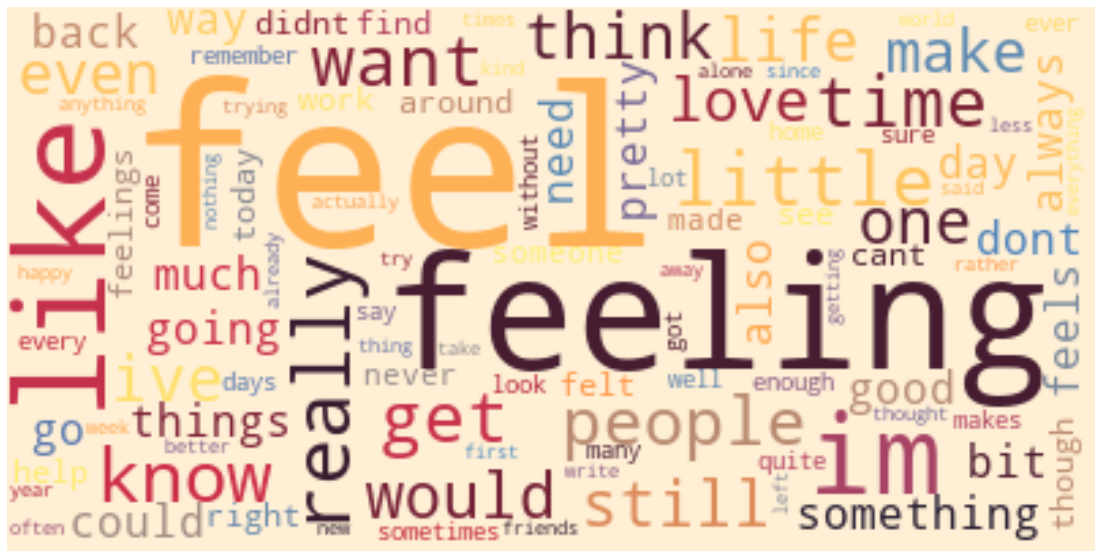

In [73]:
hero.wordcloud(dfJournal.clean_text,max_words=100)

In [74]:
from texthero import stopwords
default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["e","c","x"]))
dfJournal['clean_text'] = hero.remove_stopwords(dfJournal['clean_text'], custom_stopwords)

In [75]:
NUM_TOP_WORDS = 10
dfJournal.groupby('Emotion')['clean_text'].apply(lambda x: hero.top_words(x) [:NUM_TOP_WORDS])

Emotion              
anger     feel            463
          feeling         218
          like            113
          im              101
          really           42
          know             41
          little           38
          get              37
          would            32
          want             30
fear      feel            376
          feeling         213
          im               94
          like             82
          little           54
          really           35
          bit              35
          know             33
          nervous          32
          scared           30
happy     feel           1260
          feeling         467
          like            311
          im              250
          really           94
          time             83
          get              82
          know             77
          want             77
          little           73
love      feel            304
          feeling         104
          like    

Fastext implementation

In [76]:
import fasttext

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
dfJournal['Emotion'] = dfJournal['Emotion'].apply(lambda x:'__label__'+x)

In [79]:
train, test = train_test_split(dfJournal, test_size=0.2)

In [80]:
train.head()

,Text,Emotion,clean_text,tfidf_clean_text,pca_tfidf_clean_text
955,i probably love a handful of friends too but i...,__label__fear,probably love handful friends always feel bit ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.046593962362067115, -0.020917547626379214]"
1447,im sure ill also feel a bit nervous,__label__fear,im sure ill also feel bit nervous,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1280136630677379, 0.16250225997107098]"
3099,i strongly feel that at this point in my life ...,__label__happy,strongly feel point life longer desiring walk ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.04324310742221611, -0.010461187088327613]"
4243,i already feel sleep deprived and short on tim...,__label__sadness,already feel sleep deprived short time really ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.04058594227783587, -0.012425396481998158]"
4513,i kept crying or feeling cranky,__label__anger,kept crying feeling cranky,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.1350838194639104, -0.08565246232417095]"


In [81]:
#saving to txt file

import csv


train[['Emotion', 'clean_text']].to_csv('train_j.txt',index=False, sep= ' ' , header=None, quoting=csv.QUOTE_NONE,quotechar='', escapechar=' ')
test[['Emotion', 'clean_text']].to_csv('test_j.txt',index=False, sep= ' ' , header=None, quoting=csv.QUOTE_NONE,quotechar='', escapechar=' ')


In [82]:
model = fasttext.train_supervised('train_j.txt',wordNgrams=2, epoch = 300, lr= 0.8)


Read 0M words
Number of words:  7076
Number of labels: 6
Progress: 100.0% words/sec/thread:  722091 lr:  0.000000 avg.loss:  0.012891 ETA:   0h 0m 0s


In [83]:
model.test('test_j.txt')

(1000, 0.818, 0.818)

In [84]:
model.predict('test_j.txt')

(('__label__happy',), array([0.99992371]))

In [85]:
test.iloc[:, 1]

2829       __label__love
4952    __label__sadness
4650       __label__fear
2394      __label__anger
2503      __label__happy
              ...       
1592    __label__sadness
541       __label__happy
2008    __label__sadness
3442    __label__sadness
484       __label__happy
Name: Emotion, Length: 1000, dtype: object

In [86]:
#evaluation

y_pred = test.iloc[:, 1].apply(lambda x: model.predict(x)[0][0])
y_true = test.iloc[:, 0]

In [87]:
model.predict('clean_text')[0][0]

'__label__happy'

In [88]:
predictions = []

for line in test['clean_text']:
    predlabel = model.predict(line)[0][0]
    predictions.append(predlabel)

In [89]:
y_pred = predictions

In [90]:
y_true = test['Emotion']

In [91]:
y_pred

['__label__happy',
 '__label__sadness',
 '__label__sadness',
 '__label__anger',
 '__label__happy',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__happy',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__anger',
 '__label__sadness',
 '__label__sadness',
 '__label__happy',
 '__label__happy',
 '__label__happy',
 '__label__sadness',
 '__label__happy',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__happy',
 '__label__happy',
 '__label__fear',
 '__label__happy',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__sadness',
 '__label__love',
 '__label__happy',
 '__label__happy',
 '__label__sadness',
 '__label__sadness',
 '__label__anger',
 '__label__happy',
 '__label__love',
 '__label__happy',
 '__label__fear',
 '__label__love',
 '__label__love',
 '__label__happy',
 '__label__fear',
 '__label__sadness',
 '__label__happy',
 '__label

In [92]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_true,y_pred)

0.818

In [93]:
#test

testing_text = ' i am hungry'

Text = hero.clean(pd.Series(testing_text))[0]
model.predict(Text)

(('__label__happy',), array([0.64143717]))

In [94]:
#hero.tfidf(dfJournal['clean_text'],max_features=100, return_feature_names=True)

In [95]:
#hero.dbscan(dfJournal['clean_text'],eps=0.5,min_samples=5,metric='euclidean',metric_params=None)

In [96]:
model.save_model('model.bin')

In [97]:
model = fasttext.load_model('model.bin')

In [98]:
testing_text = ' i am happy'

Text = hero.clean(pd.Series(testing_text))[0]
model.predict(Text)

(('__label__happy',), array([1.00001001]))